In [2]:
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import linear_model
import statsmodels.api as sm 
from sklearn.preprocessing import LabelEncoder
from pandas.io.parsers import read_csv
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import ast 
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from pandas.io.parsers import read_csv
import os

final_fit_rebal = pd.read_csv('final_fit_rebal.csv',index_col=0) 
final_fit_all =  pd.read_csv('final_fit_all.csv',index_col=0) 
x_test_basic_fe = pd.read_csv('x_test_basic_fe.csv',index_col=0) 
x_test_decom_fe = pd.read_csv('x_test_decom_fe.csv',index_col=0) 


test4 = pd.read_csv('submission3_test.csv',index_col=0) 
testht = pd.read_csv('submission3_ht_test.csv',index_col=0) 

train_set = pd.read_csv('submission3_train_set.csv',index_col=0) 
test_set = pd.read_csv('submission3_test_set.csv',index_col=0) 

train4 = pd.read_csv('submission3_train.csv',index_col=0) 
trainht = pd.read_csv('submission3_train_ht.csv',index_col=0) 
val4 = pd.read_csv('submission3_val_ht.csv',index_col=0) 
valht = pd.read_csv('submission3_val.csv',index_col=0) 

In [6]:
test4[:3]

,concrete_4,soft_pvc_4,tiled_4,wood_4,carpet_4,fine_concrete_4,hard_tiles_large_space_4,soft_tiles_4
0,0.0292,0.0376,0.5324,0.4008,0.0784,0.3032,0.6148,0.0036
1,0.4644,0.3412,0.0632,0.1312,0.8292,0.0456,0.0048,0.1204
2,0.0036,0.0020,0.9716,0.0228,0.1624,0.7112,0.1008,0.0256


In [9]:
testht[:3]

,ht_0,ht_1
0,0.979169,0.020831
1,0.981577,0.018423
2,0.993117,0.006883


In [7]:
train4[-3:]

,concrete_4,soft_pvc_4,tiled_4,wood_4,carpet_4,fine_concrete_4,hard_tiles_large_space_4,soft_tiles_4,series_id,group_id,surface
3045,0.1640,0.1920,0.3692,0.2748,0.8608,0.0296,0.0420,0.0676,2718,60,carpet
3046,0.8324,0.1064,0.0192,0.0420,0.0980,0.7856,0.0872,0.0292,2819,50,concrete
3047,0.1500,0.0168,0.4024,0.4308,0.1176,0.0128,0.8624,0.0072,3418,44,hard_tiles_large_space


In [8]:
trainht[-3:]

,ht_0,ht_1,series_id,group_id,surface
3045,0.938630,0.061370,2718,60,carpet
3046,0.984816,0.015184,2819,50,concrete
3047,0.979105,0.020895,3418,44,hard_tiles_large_space


In [6]:
testall[:3]

,carpet,concrete,fine_concrete,hard_tiles,hard_tiles_large_space,soft_pvc,soft_tiles,tiled,wood,pred_1
0,0.0180,0.0052,0.0852,0.0,0.7768,0.0052,0.0016,0.0776,0.0304,hard_tiles_large_space
1,0.3156,0.3308,0.1024,0.0,0.0024,0.0960,0.0852,0.0396,0.0280,concrete
2,0.0036,0.0096,0.0504,0.0,0.0004,0.0060,0.0000,0.8884,0.0416,tiled


In [7]:
testht[:3]

,ht_0,ht_1
0,0.980615,0.019385
1,0.984060,0.015940
2,0.992512,0.007488


In [8]:
trainht[:3]

,ht_0,ht_1
0,0.956510,0.043490
1,0.993299,0.006701
2,0.967555,0.032445


In [14]:
# train_all = pd.concat([train4.iloc[:,:-3], trainht, trainall.iloc[:,:-2], trainall.iloc[:,-1]], axis=1)
# train_all.iloc[:,:-10]

train_all = pd.concat([train4.iloc[:,:-3], trainht.iloc[:,:-3]], axis=1)
train_all[:5]

# train_all = pd.concat([train4.iloc[:,:-3], trainht, trainall.iloc[:,-1]], axis=1)
# train_all = train_all[train_all.y!="hard_tiles"]

,concrete_4,soft_pvc_4,tiled_4,wood_4,carpet_4,fine_concrete_4,hard_tiles_large_space_4,soft_tiles_4,ht_0,ht_1
0,0.0016,0.0032,0.9604,0.0348,0.2208,0.2908,0.4808,0.0076,0.988573,0.011427
1,0.0040,0.0048,0.1256,0.8656,0.3456,0.4700,0.1596,0.0248,0.986407,0.013593
2,0.0136,0.4308,0.0020,0.5536,0.0872,0.8016,0.0212,0.0900,0.966681,0.033319
3,0.4532,0.2520,0.2036,0.0912,0.0268,0.9328,0.0304,0.0100,0.987434,0.012566
4,0.0056,0.0112,0.9256,0.0576,0.0912,0.7780,0.1224,0.0084,0.981920,0.018080


In [16]:
val_all = pd.concat([ valht.iloc[:,:-3],val4.iloc[:,:-3]], axis=1)
val_all[:5]

,concrete_4,soft_pvc_4,tiled_4,wood_4,carpet_4,fine_concrete_4,hard_tiles_large_space_4,soft_tiles_4,ht_0,ht_1
0,0.0132,0.0072,0.5632,0.4164,0.6760,0.1616,0.1056,0.0568,0.989574,0.010426
1,0.1256,0.5340,0.0380,0.3024,0.0796,0.5940,0.0756,0.2508,0.826874,0.173126
2,0.0488,0.5396,0.0840,0.3276,0.0468,0.1204,0.1524,0.6804,0.946810,0.053190
3,0.0124,0.0204,0.0028,0.9644,0.5000,0.2380,0.0828,0.1792,0.729131,0.270869
4,0.0028,0.9624,0.0020,0.0328,0.1888,0.6140,0.0404,0.1568,0.963949,0.036051


In [17]:
# test_all = pd.concat([test4.iloc[:,:-2], testht, testall.iloc[:,:-1]], axis=1)
# test_all[:5]
test_all = pd.concat([test4, testht], axis=1)
test_all[:5]

,concrete_4,soft_pvc_4,tiled_4,wood_4,carpet_4,fine_concrete_4,hard_tiles_large_space_4,soft_tiles_4,ht_0,ht_1
0,0.0292,0.0376,0.5324,0.4008,0.0784,0.3032,0.6148,0.0036,0.979169,0.020831
1,0.4644,0.3412,0.0632,0.1312,0.8292,0.0456,0.0048,0.1204,0.981577,0.018423
2,0.0036,0.0020,0.9716,0.0228,0.1624,0.7112,0.1008,0.0256,0.993117,0.006883
3,0.1448,0.1312,0.1736,0.5504,0.3660,0.0324,0.0284,0.5732,0.970277,0.029723
4,0.1188,0.5092,0.0292,0.3428,0.0560,0.0220,0.0168,0.9052,0.855661,0.144339


In [33]:

clf =  RandomForestClassifier(n_estimators = 500, n_jobs = -1)

y_train = train4.iloc[:,-1]
y_val = val4.iloc[:,-1]

clf.fit(train_all, y)
print('score ', clf.score(val_all,  y_val))


score  0.821522309711286


In [34]:
sub_preds_rf = np.zeros((test_all.shape[0],9))
sub_preds_rf = clf.predict_proba(test_all)

In [35]:
submit = pd.read_csv('/data/kagglecon19/sample_submission.csv')
submit['surface'] = [clf.classes_[i] for i in sub_preds_rf.argmax(axis=1)]



In [36]:
submit.groupby(['surface']).count()

,series_id
surface,
carpet,194
concrete,898
fine_concrete,371
hard_tiles,6
hard_tiles_large_space,211
soft_pvc,701
soft_tiles,419
tiled,363
wood,653


In [43]:

clf =  RandomForestClassifier(n_estimators = 500, n_jobs = -1)

le= LabelEncoder()
y_train = le.fit_transform(train4.iloc[:,-1])
y_val =  le.fit_transform(val4.iloc[:,-1])

clf.fit(train_all, y_train)

print('score ', clf.score(val_all,  y_val))


score  0.8241469816272966


In [44]:
sub_preds_rf = np.zeros((test_all.shape[0],9))
sub_preds_rf = clf.predict_proba(test_all)

In [45]:
submit = pd.read_csv('/data/kagglecon19/sample_submission.csv')
submit['surface'] = le.inverse_transform(sub_preds_rf.argmax(axis=1))

In [46]:
le.inverse_transform(sub_preds_rf.argmax(axis=1))

array(['hard_tiles_large_space', 'carpet', 'tiled', ..., 'concrete',
       'concrete', 'wood'], dtype=object)

In [47]:
submit.groupby(['surface']).count()

,series_id
surface,
carpet,188
concrete,903
fine_concrete,380
hard_tiles,6
hard_tiles_large_space,212
soft_pvc,708
soft_tiles,427
tiled,360
wood,632


In [48]:
submit.to_csv('submission_final.csv')

In [ ]:

feature =  t.iloc[:,:-1]
    y = t.iloc[:,-1]
    v_feature = v.iloc[:,:-1]
    v_y = v.iloc[:,-1]


score = 0
feature_imp = []
pred_vs_actual = []
feature_test = test_all

oof_preds_rf = np.zeros((final_fit_all_ht1.shape[0]))
sub_preds_rf = np.zeros((test_all.shape[0],9))

for t, v in zip(test, val): 
    print('-'*20,  '-'*20)
    clf =  RandomForestClassifier(n_estimators = 500, n_jobs = -1)
    feature =  t.iloc[:,:-1]
    y = t.iloc[:,-1]
    v_feature = v.iloc[:,:-1]
    v_y = v.iloc[:,-1]

    #class_weight : dict, list of dicts, “balanced”, “balanced_subsample” or None, optional (default=None)
    
    # n_estimators : The number of trees in the forest.
    clf.fit(feature, y)


    oof_preds_rf = clf.predict(v_feature)
    sub_preds_rf += clf.predict_proba(feature_test) / 10



    score += clf.score(v_feature,  v_y)

    print('score ', clf.score(v_feature,  v_y))


    pred_vs_actual.append([clf.predict_proba(v_feature), v_y, oof_preds_rf ])

#         plt.figure(figsize=(7, 10))
#         plt.title('Feature Importances')
#         plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
#         plt.yticks(range(len(indices[:hm])), [features[i] for i in indices])
#         plt.xlabel('Relative Importance')
#         plt.show()

print('Avg Accuracy', score / 10)    


In [56]:
# # final_fit_all_ht1 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# # final_fit_all_ht2 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# # final_fit_all_ht3 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# # final_fit_all_ht4 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# # final_fit_all_ht5 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# # final_fit_all_ht6 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# # final_fit_all_ht7 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# # final_fit_all_ht8 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# # final_fit_all_ht9 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# # final_fit_all_ht10 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht1 = train_all.groupby('y').apply(lambda x: x.sample(21, replace=True)).reset_index(drop=True)
# final_fit_all_ht2 = train_all.groupby('y').apply(lambda x: x.sample(21, replace=True)).reset_index(drop=True)

In [105]:
# final_fit_all_ht1 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht2 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht3 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht4 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht5 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht6 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht7 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht8 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht9 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht10 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht11 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht12 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht13 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht14 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht15 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht16 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht17 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht18 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht19 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)
# final_fit_all_ht20 = train_all.groupby('y').apply(lambda x: x.sample(21)).reset_index(drop=True)





In [96]:
# final_fit_all_ht1 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht2 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht3 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht4 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht5 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht6 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht7 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht8 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht9 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht10 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht11 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht12 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht13 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht14 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht15 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht16 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht17 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht18 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht19 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)
# final_fit_all_ht20 = train_all.groupby('y').apply(lambda x: x.sample(189)).reset_index(drop=True)

In [106]:
# test = [final_fit_all_ht1, final_fit_all_ht2, final_fit_all_ht3, final_fit_all_ht4, final_fit_all_ht5, final_fit_all_ht15, final_fit_all_ht16,final_fit_all_ht17,final_fit_all_ht18,final_fit_all_ht19]
# val = [final_fit_all_ht6, final_fit_all_ht7, final_fit_all_ht8, final_fit_all_ht9, final_fit_all_ht10, final_fit_all_ht11, final_fit_all_ht12,final_fit_all_ht13,final_fit_all_ht14,final_fit_all_ht20]

In [108]:

# score = 0
# feature_imp = []
# pred_vs_actual = []
# feature_test = test_all

# oof_preds_rf = np.zeros((final_fit_all_ht1.shape[0]))
# sub_preds_rf = np.zeros((test_all.shape[0],9))

# for t, v in zip(test, val): 
#     print('-'*20,  '-'*20)
#     clf =  RandomForestClassifier(n_estimators = 500, n_jobs = -1)
#     feature =  t.iloc[:,:-1]
#     y = t.iloc[:,-1]
#     v_feature = v.iloc[:,:-1]
#     v_y = v.iloc[:,-1]

#     #class_weight : dict, list of dicts, “balanced”, “balanced_subsample” or None, optional (default=None)
    
#     # n_estimators : The number of trees in the forest.
#     clf.fit(feature, y)


#     oof_preds_rf = clf.predict(v_feature)
#     sub_preds_rf += clf.predict_proba(feature_test) / 10



#     score += clf.score(v_feature,  v_y)

#     print('score ', clf.score(v_feature,  v_y))


#     pred_vs_actual.append([clf.predict_proba(v_feature), v_y, oof_preds_rf ])

# #         plt.figure(figsize=(7, 10))
# #         plt.title('Feature Importances')
# #         plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
# #         plt.yticks(range(len(indices[:hm])), [features[i] for i in indices])
# #         plt.xlabel('Relative Importance')
# #         plt.show()

# print('Avg Accuracy', score / 10)    





-------------------- --------------------
score  0.9153439153439153
-------------------- --------------------
score  0.91005291005291
-------------------- --------------------
score  0.9259259259259259
-------------------- --------------------
score  0.873015873015873
-------------------- --------------------
score  0.8888888888888888
-------------------- --------------------
score  0.91005291005291
-------------------- --------------------
score  0.9206349206349206
-------------------- --------------------
score  0.873015873015873
-------------------- --------------------
score  0.8941798941798942
-------------------- --------------------
score  0.9206349206349206
Avg Accuracy 0.9031746031746032


In [109]:
clf.classes_

array(['carpet', 'concrete', 'fine_concrete', 'hard_tiles',
       'hard_tiles_large_space', 'soft_pvc', 'soft_tiles', 'tiled',
       'wood'], dtype=object)

In [110]:
submit = pd.read_csv('/data/kagglecon19/sample_submission.csv')
submit['surface'] = [clf.classes_[i] for i in sub_preds_rf.argmax(axis=1)]



In [111]:
submit.groupby(['surface']).count()

,series_id
surface,
carpet,214
concrete,754
fine_concrete,664
hard_tiles,34
hard_tiles_large_space,268
soft_pvc,510
soft_tiles,469
tiled,299
wood,604


In [112]:
submit.to_csv('submission_final.csv')

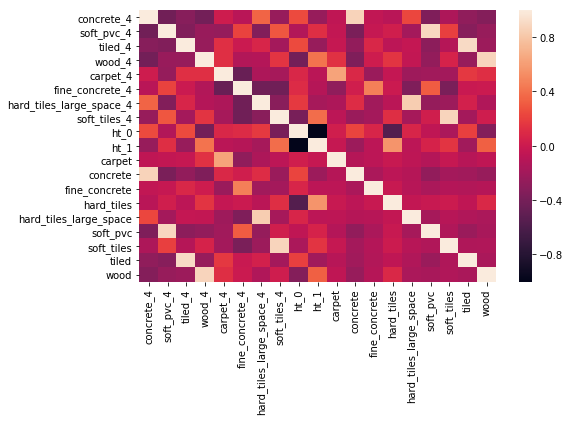

In [51]:

fig, ax = plt.subplots(figsize=(8, 5))
corr = train_all.iloc[:,:-1].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [117]:

feature = train_all.iloc[:,:-1]
feature_test = test_all


# first transform y
le = LabelEncoder()
y = le.fit_transform(train_all.iloc[:,-1])

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
# class_weight : dict, list of dicts, “balanced”, “balanced_subsample” or None, optional (default=None)
# get group_id so that it's split correctly

num_class = len(le.classes_)

score = 0
feature_imp = []


oof_preds_rf = np.zeros((train_all.shape[0]))
sub_preds_rf = np.zeros((test_all.shape[0],9))


for i, (train_index, val_index) in  enumerate(sss.split(feature, y)): 
    print('-'*20, i, '-'*20)

    clf =  RandomForestClassifier(n_estimators = 500, n_jobs = -1)
    # n_estimators : The number of trees in the forest.
    clf.fit(feature.iloc[train_index], y[train_index])


    oof_preds_rf[val_index] = clf.predict(feature.iloc[val_index])
    sub_preds_rf += clf.predict_proba(feature_test) / sss.n_splits



    score += clf.score(feature.iloc[val_index],  y[val_index])

    print('score ', clf.score(feature.iloc[val_index],  y[val_index]))



print('Avg Accuracy', score / sss.n_splits)    



-------------------- 0 --------------------
score  0.9409448818897638
-------------------- 1 --------------------
score  0.9455380577427821
-------------------- 2 --------------------
score  0.9455380577427821
-------------------- 3 --------------------
score  0.94750656167979
-------------------- 4 --------------------
score  0.9435695538057742
-------------------- 5 --------------------
score  0.9422572178477691
-------------------- 6 --------------------
score  0.9442257217847769
-------------------- 7 --------------------
score  0.931758530183727
-------------------- 8 --------------------
score  0.9442257217847769
-------------------- 9 --------------------
score  0.9396325459317585
Avg Accuracy 0.94251968503937


In [120]:
submit = pd.read_csv('/data/kagglecon19/sample_submission.csv')

submit['surface'] = le.inverse_transform(sub_preds_rf.argmax(axis=1))

submit.to_csv('submit_final.csv')
submit.groupby(['surface']).count()

,series_id
surface,
carpet,178
concrete,867
fine_concrete,499
hard_tiles,9
hard_tiles_large_space,205
soft_pvc,664
soft_tiles,403
tiled,316
wood,675


In [121]:
submit.groupby(['surface']).count()

,series_id
surface,
carpet,178
concrete,867
fine_concrete,499
hard_tiles,9
hard_tiles_large_space,205
soft_pvc,664
soft_tiles,403
tiled,316
wood,675


In [12]:
# accuracy_analysis_1 = pd.DataFrame(pred_vs_actual[0][0])
# accuracy_analysis_1 = pd.concat([accuracy_analysis_1, pd.DataFrame(pred_vs_actual[0][1])], axis=1)
# accuracy_analysis_1 = pd.concat([accuracy_analysis_1, pd.DataFrame(pred_vs_actual[0][2])], axis=1)
# # accuracy_analysis_1 = pd.concat([accuracy_analysis_1, pd.DataFrame(pred_vs_actual[0][3]).reset_index(drop=True)], axis=1)
# accuracy_analysis_1.columns = ['0','1','actual','pred']


# accuracy_analysis_2 = pd.DataFrame(pred_vs_actual[1][0])
# accuracy_analysis_2 = pd.concat([accuracy_analysis_2, pd.DataFrame(pred_vs_actual[1][1])], axis=1)
# accuracy_analysis_2 = pd.concat([accuracy_analysis_2, pd.DataFrame(pred_vs_actual[1][2])], axis=1)
# # accuracy_analysis_2 = pd.concat([accuracy_analysis_2, pd.DataFrame(pred_vs_actual[1][3]).reset_index(drop=True)], axis=1)
# accuracy_analysis_2.columns =  ['0','1','actual','pred']


# accuracy_analysis_3 = pd.DataFrame(pred_vs_actual[2][0])
# accuracy_analysis_3 = pd.concat([accuracy_analysis_3, pd.DataFrame(pred_vs_actual[2][1])], axis=1)
# accuracy_analysis_3 = pd.concat([accuracy_analysis_3, pd.DataFrame(pred_vs_actual[2][2])], axis=1)
# # accuracy_analysis_3 = pd.concat([accuracy_analysis_3, pd.DataFrame(pred_vs_actual[2][3]).reset_index(drop=True)], axis=1)
# accuracy_analysis_3.columns =  ['0','1','actual','pred']


# accuracy_analysis_4 = pd.DataFrame(pred_vs_actual[3][0])
# accuracy_analysis_4 = pd.concat([accuracy_analysis_4, pd.DataFrame(pred_vs_actual[3][1])], axis=1)
# accuracy_analysis_4 = pd.concat([accuracy_analysis_4, pd.DataFrame(pred_vs_actual[3][2])], axis=1)
# # accuracy_analysis_4 = pd.concat([accuracy_analysis_4, pd.DataFrame(pred_vs_actual[3][3]).reset_index(drop=True)], axis=1)
# accuracy_analysis_4.columns = ['0','1','actual','pred']


# accuracy_analysis_5 = pd.DataFrame(pred_vs_actual[4][0])
# accuracy_analysis_5 = pd.concat([accuracy_analysis_5, pd.DataFrame(pred_vs_actual[4][1])], axis=1)
# accuracy_analysis_5 = pd.concat([accuracy_analysis_5, pd.DataFrame(pred_vs_actual[4][2])], axis=1)
# # accuracy_analysis_5 = pd.concat([accuracy_analysis_5, pd.DataFrame(pred_vs_actual[4][3]).reset_index(drop=True)], axis=1)
# accuracy_analysis_5.columns =  ['0','1','actual','pred']




In [13]:
accuracy_analysis_1[(accuracy_analysis_1.actual!= 0 )| (accuracy_analysis_1.pred!=0)|(accuracy_analysis_1['1']>0.3)]

,0,1,actual,pred
45,0.187853,0.812147,1,1
46,0.357263,0.642737,1,1
47,0.215392,0.784608,1,1
48,0.231065,0.768935,1,1
49,0.440514,0.559486,1,1
50,0.253921,0.746079,1,1
51,0.589535,0.410465,1,0
52,0.388599,0.611401,1,1
53,0.466888,0.533112,1,1
54,0.436386,0.563614,1,1


In [84]:

score = 0
feature_imp = []
pred_vs_actual = []
feature_test = test_all

oof_preds_rf = np.zeros((final_fit_all_ht1.shape[0]))
sub_preds_rf = np.zeros((test_all.shape[0],9))


for t, v in zip(test, val): 
    print('-'*20,  '-'*20)
    neigh = KNeighborsClassifier(n_neighbors=3)
    feature =  t.iloc[:,:-1]
    y = t.iloc[:,-1]
    v_feature = v.iloc[:,:-1]
    v_y = v.iloc[:,-1]

    
    # n_estimators : The number of trees in the forest.
    neigh.fit(feature, y)

    oof_preds_rf = clf.predict(v_feature)
    sub_preds_rf += clf.predict_proba(feature_test) / 10



    score += clf.score(v_feature,  v_y)

    print('score ', clf.score(v_feature,  v_y))

print('Avg Accuracy', score / 10)    











-------------------- --------------------
score  0.8677248677248677
-------------------- --------------------
score  0.8941798941798942
-------------------- --------------------
score  0.8465608465608465
-------------------- --------------------
score  0.8306878306878307
-------------------- --------------------
score  0.8941798941798942
-------------------- --------------------
score  0.8677248677248677
-------------------- --------------------
score  0.8835978835978836
-------------------- --------------------
score  0.8677248677248677
-------------------- --------------------
score  0.8783068783068783
-------------------- --------------------
score  0.8624338624338624
Avg Accuracy 0.8693121693121693


In [ ]:
# sns.distplot(x);

In [85]:
submit = pd.read_csv('/data/kagglecon19/sample_submission.csv')
submit['surface'] = [clf.classes_[i] for i in sub_preds_rf.argmax(axis=1)]
submit.groupby(['surface']).count()

,series_id
surface,
carpet,238
concrete,667
fine_concrete,722
hard_tiles,36
hard_tiles_large_space,254
soft_pvc,530
soft_tiles,438
tiled,417
wood,514


In [16]:
prediction_ht.to_csv('submission3_ht.csv')

In [17]:
accuracy_analysis_2[(accuracy_analysis_2.actual!= 0 )| (accuracy_analysis_2.pred!=0)]

,0,1,actual,pred
43,0.418223,0.581777,0,1
45,0.451641,0.548359,1,1
46,0.546897,0.453103,1,0
47,0.061922,0.938078,1,1
48,0.464564,0.535436,1,1
49,0.066218,0.933782,1,1
50,0.183160,0.816840,1,1
51,0.609838,0.390162,1,0
52,0.287468,0.712532,1,1
53,0.376819,0.623181,1,1


In [18]:

accuracy_analysis_5[(accuracy_analysis_5.actual != 0) | (accuracy_analysis_5.pred != 0)]

,0,1,actual,pred
45,0.126791,0.873209,1,1
46,0.177549,0.822451,1,1
47,0.214706,0.785294,1,1
48,0.374843,0.625157,1,1
49,0.187756,0.812244,1,1
50,0.469870,0.530130,1,1
51,0.233372,0.766628,1,1
52,0.297954,0.702046,1,1
53,0.781736,0.218264,1,0
54,0.559763,0.440237,1,0


In [24]:
final_fit_all_ht1 = final_fit_all.groupby('surface').apply(lambda x: x.sample(15)).reset_index(drop=True)
final_fit_all_ht2 = final_fit_all.groupby('surface').apply(lambda x: x.sample(15)).reset_index(drop=True)
final_fit_all_ht3 = final_fit_all.groupby('surface').apply(lambda x: x.sample(15)).reset_index(drop=True)
final_fit_all_ht4 = final_fit_all.groupby('surface').apply(lambda x: x.sample(15)).reset_index(drop=True)
final_fit_all_ht5 = final_fit_all.groupby('surface').apply(lambda x: x.sample(15)).reset_index(drop=True)
final_fit_all_ht6 = final_fit_all.groupby('surface').apply(lambda x: x.sample(15)).reset_index(drop=True)
final_fit_all_ht7 = final_fit_all.groupby('surface').apply(lambda x: x.sample(15)).reset_index(drop=True)
final_fit_all_ht8 = final_fit_all.groupby('surface').apply(lambda x: x.sample(15)).reset_index(drop=True)
final_fit_all_ht9 = final_fit_all.groupby('surface').apply(lambda x: x.sample(15)).reset_index(drop=True)
final_fit_all_ht10 = final_fit_all.groupby('surface').apply(lambda x: x.sample(15)).reset_index(drop=True)

In [25]:
test = [final_fit_all_ht1, final_fit_all_ht2, final_fit_all_ht3, final_fit_all_ht4, final_fit_all_ht5]
val = [final_fit_all_ht6, final_fit_all_ht7, final_fit_all_ht8, final_fit_all_ht9, final_fit_all_ht10]

In [27]:

score = 0
feature_imp = []
pred_vs_actual = []
feature_test = final_fit_all_test.iloc[:,1:]

oof_preds_rf = np.zeros((final_fit_all_ht1.shape[0]))
sub_preds_rf = np.zeros((final_fit_all_test.shape[0],9))

for t, v in zip(test, val): 
    print('-'*20,  '-'*20)
    clf =  RandomForestClassifier(n_estimators = 500, n_jobs = -1, max_depth = 5)
    feature =  t.iloc[:,:-3]
    y = t.iloc[:,-1]
    v_feature = v.iloc[:,:-3]
    v_y = v.iloc[:,-1]

    
    # n_estimators : The number of trees in the forest.
    clf.fit(feature, y)


    oof_preds_rf = clf.predict(v_feature)
    sub_preds_rf += clf.predict_proba(feature_test) / 5



    score += clf.score(v_feature,  v_y)

    print('score ', clf.score(v_feature,  v_y))


    pred_vs_actual.append([clf.predict_proba(v_feature), v_y, oof_preds_rf ])

#         plt.figure(figsize=(7, 10))
#         plt.title('Feature Importances')
#         plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
#         plt.yticks(range(len(indices[:hm])), [features[i] for i in indices])
#         plt.xlabel('Relative Importance')
#         plt.show()

print('Avg Accuracy', score / 5)    





-------------------- --------------------
score  0.5481481481481482
-------------------- --------------------
score  0.5555555555555556
-------------------- --------------------
score  0.6666666666666666
-------------------- --------------------
score  0.6444444444444445
-------------------- --------------------
score  0.5407407407407407
Avg Accuracy 0.591111111111111


In [ ]:
prediction_combined.to_csv('submission3.csv')

In [ ]:
train_X = pd.read_csv('../input/X_train.csv').iloc[:,3:].values.reshape(-1,128,10)
test_X  = pd.read_csv('../input/X_test.csv' ).iloc[:,3:].values.reshape(-1,128,10)
print('train_X shape:', train_X.shape, ', test_X shape:', test_X.shape)

In [ ]:
def sq_dist(a,b):
    ''' the squared euclidean distance between two samples '''
    
    return np.sum((a-b)**2, axis=1)


def find_run_edges(data, edge):
    ''' examine links between samples. left/right run edges are those samples which do not have a link on that side. '''

    if edge == 'left':
        border1 = 0
        border2 = -1
    elif edge == 'right':
        border1 = -1
        border2 = 0
    else:
        return False
    
    edge_list = []
    linked_list = []
    
    for i in range(len(data)):
        dist_list = sq_dist(data[i, border1, :4], data[:, border2, :4]) # distances to rest of samples
        min_dist = np.min(dist_list)
        closest_i   = np.argmin(dist_list) # this is i's closest neighbor
        if closest_i == i: # this might happen and it's definitely wrong
            print('Sample', i, 'linked with itself. Next closest sample used instead.')
            closest_i = np.argsort(dist_list)[1]
        dist_list = sq_dist(data[closest_i, border2, :4], data[:, border1, :4]) # now find closest_i's closest neighbor
        rev_dist = np.min(dist_list)
        closest_rev = np.argmin(dist_list) # here it is
        if closest_rev == closest_i: # again a check
            print('Sample', i, '(back-)linked with itself. Next closest sample used instead.')
            closest_rev = np.argsort(dist_list)[1]
        if (i != closest_rev): # we found an edge
            edge_list.append(i)
        else:
            linked_list.append([i, closest_i, min_dist])
            
    return edge_list, linked_list


def find_runs(data, left_edges, right_edges):
    ''' go through the list of samples & link the closest neighbors into a single run '''
    
    data_runs = []

    for start_point in left_edges:
        i = start_point
        run_list = [i]
        while i not in right_edges:
            tmp = np.argmin(sq_dist(data[i, -1, :4], data[:, 0, :4]))
            if tmp == i: # self-linked sample
                tmp = np.argsort(sq_dist(data[i, -1, :4], data[:, 0, :4]))[1]
            i = tmp
            run_list.append(i)
        data_runs.append(np.array(run_list))
    
    return data_runs

In [ ]:
train_left_edges, train_left_linked  = find_run_edges(train_X, edge='left')
train_right_edges, train_right_linked = find_run_edges(train_X, edge='right')
print('Found', len(train_left_edges), 'left edges and', len(train_right_edges), 'right edges.')

In [ ]:
train_runs = find_runs(train_X, train_left_edges, train_right_edges)

In [ ]:
flat_list = [series_id for run in train_runs for series_id in run]
print(len(flat_list), len(np.unique(flat_list)))

In [ ]:
fig, axes = plt.subplots(10,1, sharex=True)
fig.set_size_inches(20,15)
fig.subplots_adjust(hspace=0)

for i in range(10):
    axes[i].plot(train_X[train_runs[0]][:,:,i].reshape(-1))
    axes[i].grid(True)

In [ ]:
df_train_y['run_id'] = 0
df_train_y['run_pos'] = 0

for run_id in range(len(train_runs)):
    for run_pos in range(len(train_runs[run_id])):
        series_id = train_runs[run_id][run_pos]
        df_train_y.at[ series_id, 'run_id'  ] = run_id
        df_train_y.at[ series_id, 'run_pos' ] = run_pos

df_train_y.to_csv('y_train_with_runs.csv', index=False)
df_train_y.tail()

In [ ]:
test_left_edges, test_left_linked  = find_run_edges(test_X, edge='left')
test_right_edges, test_right_linked = find_run_edges(test_X, edge='right')
print('Found', len(test_left_edges), 'left edges and', len(test_right_edges), 'right edges.')

In [ ]:
test_runs = find_runs(test_X, test_left_edges, test_right_edges)

In [ ]:
flat_list = [series_id for run in test_runs for series_id in run]
print(len(flat_list), len(np.unique(flat_list)))

In [ ]:
lost_samples = np.array([ i for i in range(len(test_X)) if i not in np.concatenate(test_runs) ])
print(lost_samples)
print(len(lost_samples))

In [ ]:
find_run_edges(test_X[lost_samples], edge='left')[1][0]

In [ ]:
lost_run = np.array(lost_samples[find_runs(test_X[lost_samples], [0], [5])[0]])
test_runs.append(lost_run)

In [ ]:
fig, axes = plt.subplots(10,1, sharex=True)
fig.set_size_inches(20,15)
fig.subplots_adjust(hspace=0)

for i in range(10):
    axes[i].plot(test_X[test_runs[1]][:,:,i].reshape(-1))
    axes[i].grid(True)